## AI初探-自己打造神經網路模型
在這個課程裡，我們會介紹如果運用 keras 介面搭配 tensorflow 框架打造一個神經網路模型來訓練電腦辨認物體. 這邊我們採用 [Cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html) 資料集作為範例. Cifar-10 是由深度學習大師 Geoffrey Hinton 教授與其在加拿大多倫多大學的學生 Alex Krixhevsky 與 Vinoid Nair 整理的影像資料集, 包含 6 萬筆 32x32 低解析度彩色圖片, 其中 5 萬筆為訓練集, 1 萬筆為測試集, 是機器學習中常用的圖片辨識資料集  

&copy; 2019 Chih-Chang Yu@CYCU MIT License

我們先介紹你開啟的這個檔案. 這個檔案使用的環境叫做 **Jupyter Notebook**, Notebook 的意思是把原本再命令提示字元將文字終端機操作編寫程式的方式, 延伸可互動式的架構, 並提供一個使用瀏覽器的環境來處理整個過程, 包括程式的撰寫與執行(可立即顯示執行的結果), 甚至是文件化(程式內容的說明). 而 IPython 是 Notebook 其中的一個執行核心(kernel). Jupyter 則是從 IPython 的基礎繼續發展成支援多種語言的開發環境例如Julia, R, Java, C#, Go, Ruby, JavaScript等等.  
為了讓你熟悉 Jupyter Notebook 的環境, 請嘗試雙擊這個單元格. 您會注意到文字區塊的顯示方式改變了. 雙擊這個動作允許你對此處顯示的文字區塊進行編輯. 這個文字區塊是使用 [Markdown](https://markdown.tw/) 編寫的，這是一種很容易對文字區塊進行排版(包含使用標題, 超連結, 字體大小等等格式化文字的方法. 你可以在上方的下拉式選單選擇這個區塊是程式碼(Code)的區塊, Markdown還是純文字. 無論是編輯 Markdown 還是程式碼區塊都可以使用鍵盤快捷鍵 **Shift + Enter** 來執行區塊內的程式或文字語法。或者你可以從上方的選單列點擊 **Run** 按鈕. 執行後, 這個區塊將會顯示格式化的文本.

這個檔案的附檔名為 .ipynb, 就是 IPython Notebook 的縮寫. 目前有很多線上平台都支援這個格式的讀取例如 [github](https://www.github.com). 另外 Google 的 [colab平台](https://colab.research.google.com/notebooks/welcome.ipynb) 甚至提供完整的開發環境, 你只要把你的 ipynb 檔案上傳到你的 google drive 就可以直接用瀏覽器打開這個檔案進行開發.

註: 如果你想了解怎麼在自己的電腦上安裝 jupyter notebook, 你可以參考[這裡](https://medium.com/python4u/jupyter-notebook%E5%AE%8C%E6%95%B4%E4%BB%8B%E7%B4%B9%E5%8F%8A%E5%AE%89%E8%A3%9D%E8%AA%AA%E6%98%8E-b8fcadba15f)

如果你曾經學過撰寫 python 語言, 學習怎麼使用 Notebook 應該不是太難.  
首先我們要先匯入一些機器學習常用的函式庫. 執行下面的程式區塊來匯入這些函式庫.

In [1]:
# importing a few necessary libraries 
import numpy as np
import random

上面的程式匯入了兩個函式庫, 分別叫做 numpy 與 random, 其中 random 是 python 語言的標準函式庫, 提供一些取亂數的方法. `numpy` 的正式名稱為NumPy, 是一個開源的延伸函式庫, 使用自定義的資料格式(稱為 NumPy array)來處理更多複雜的數學運算(例如矩陣的相乘等等), 機器學習中的許多資料都會儲存成 NumPy 的格式. [NumPy網站](https://www.numpy.org/)  
註: numpy 後面的 as np 表示我們使用 np 這個別名來表示 numpy 函式庫, 這樣之後的程式就可以只寫 np 而不用寫 numpy 全名.

## 步驟1: 載入資料
Cifar-10資料集的大小約為170mb, 我們可以透過keras提供的方法來載入這個資料集,使用方法為  
```python
from tensorflow.keras.datasets import cifar10
```
匯入完畢後我們就可以使用`cifar10.load_data()`來載入資料集。第一次使用的時候必須先從網路上下載這個資料集，因此會先花掉一點時間。

In [2]:
from tensorflow.keras.datasets import cifar10

下載下來的資料會被存放在下面的位置, 讀者們可以自行到該資料夾位置查看實際的檔案    
(windows)`C:\Users\MY_USER_NAME\.keras\datasets`  
(ubuntu)`~/.keras/datasets/cifar-10-batches-py`  

載入的資料會自動被分成訓練資料與測試資料, 訓練資料用來訓練模型, 測試資料用來評估模型的泛用性(generalization, 表示模型可以處理從未看過的資料).  兩種資料分別有影像資料跟對應的標記(label). 我們可以使用下面的語法將他們區分開來:

In [3]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

我們來看一下資料的組成. 請執行下面的程式區塊. `print` 這個指令會印出 X_train 和 y_train 的儲存結構.

In [4]:
# show how training data are stored.
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))

X_train:(50000, 32, 32, 3)
y_train:(50000, 1)


**X_train** 的組成結構為 (影像編號, 寬, 高, 通道數), **y_train** 的組成結構為 (影像編號,1).  
**X_train** 的結構表示說有50000張的訓練影像, 影像尺寸為32x32, 3表示是由 r,g,b 三原色組成的彩色影像.  
**y_train** 的內容則是這50000張影像的對應類別編號, 記錄了每張影像屬於哪個類別. cifar10資料集內有10種不同的物體, 因此 **y_train** 的內容會是介於 0-9 的數字.

我們隨機的挑出一張圖片來看一下他的內容. python有一個套件matplotlib可以協助我們做到這件事情.使用方式也很簡單,只要輸入下列指令就可匯入此套件：  
```python 
import matplotlib.pyplot as plt
``` 
有興趣的讀者可以到[matplotlib網站](https://matplotlib.org/)查看更多的資訊.

接著我們使用`random.randint()`來隨意挑出一張圖片的資料並使用 `plt.imshow()` 指令來顯示圖片. 你可以嘗試多執行幾次下面的程式片段來檢查不同的圖片內容.

In [5]:
import matplotlib.pyplot as plt

idx = random.randint(0, 49999)  #隨機的從50000張圖片中挑出一張
im = X_train[idx]               #找出這張圖片
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(im)
plt.show()
print('the label is '+ str(y_train[idx][0]))

<Figure size 200x200 with 1 Axes>

the label is 7


下面是 **y_train** 中每個數字對應的類別名稱, 你可以用來對照上面圖片是哪一個類別：

|編號|0|1|2|3|4|5|6|7|8|9
|---|---|---|---|---|---|---|---|---|---|---|
|名稱|airplane|automobile|bird|cat|deer|dog|frog|horse|ship|truck

為了把資料的類別表示得更清楚, 我們可以建立一個表來查詢每個數字究竟是對應到哪一種物體.

In [6]:
label_name=['airplaine', 'automobile', 'bird', 'cat', 'deer', 
            'dog', 'frog', 'horse', 'ship', 'truck']

接著我們可以隨機的挑出幾張圖片並標記出對應的類別名稱.你一樣可以嘗試多執行幾次下面的程式片段來檢查不同的圖片內容.

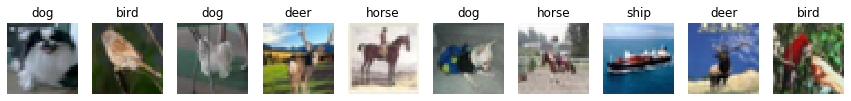

In [7]:
fig, ax = plt.subplots(1, 10, figsize=(15,5))
for i in range(10):
    idx = random.randint(0, 49999)
    im = X_train[idx]
    label = y_train[idx][0]
    ax[i].imshow(im)
    ax[i].set_title(label_name[label])
    ax[i].axis('off')

## 步驟2: 資料的預處理 (preprocessing)
把資料交由模型訓練前, 我們有一些事情要做:
- 資料正規化. 這邊正規化的意思是, 原本數位影像儲存的資訊是0-255的數字, 我們要把他正規化到0-1之間, 這樣模型才能學得比較穩定.
- 把資料分成兩塊: 訓練樣本(training data)與驗證樣本(validation data). 目的是為了驗證模型的穩定度, 並找出最佳的參數設定.

我們先正規化載入的資料:

In [8]:
X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

print('the minimum value of X is {:.1f} and the maximum value of X is {:.1f}'.format(np.min(X_train), np.max(X_train)))
print('data normalization is done.')

the minimum value of X is 0.0 and the maximum value of X is 1.0
data normalization is done.


再來我們要處理負責儲存物體類別標記的資料 y_train 跟 y_test. 原本標記的資料內容是介於 0-9 的數字, 但這個數字的不同對於分類問題來說是沒有意義的, 因為cat被分成第三類, 而鳥被分成第二類的原因並不是因為數字3比數字2來的大, 僅僅是因為他們代表不同的東西而已. 因此, 我們得先把數字 0-9 轉換成 **10個類別**. 這件事可以利用**one-hot encoding**技術做到. 所謂的 one-hot encoding 就是把資料用一個二元的向量來表示, 每一個數字在轉換的二元向量中只會擁有一個 1,其他都是 0.  
舉例來說, 如果想要區分紅, 黃, 綠三種顏色, 我們可以定義每種顏色分別為 
```python
[1, 0, 0]  #Red
[0, 1, 0]  #Yellow
[0, 0, 1]  #Green
```

在keras中, 我們可以利用`to_categorical()`這個函式來做到這個轉換:

In [9]:
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y_train)

執行下面的程式片段, 你可以看到轉換的結果.

In [10]:
idx = random.randint(1,49999)
print('original label is: '+ str(y_train[idx]))
print('corresponding one-hot encoding:'+ str(y_categorical[idx]))

original label is: [9]
corresponding one-hot encoding:[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


到這邊你應該可以理解, 所謂的分類就是給予模型一個輸入, 根據哪一個位置的輸出是1, 就是代表輸入資料屬於那個類別. (實際上輸出的值不一定會是1, 所以我們通常是取最大值, 表示最有可能的類別)  
在開始訓練之前, 我們要先把資料集打散並區分成訓練樣本(training data)與驗證樣本(validation data). 也就是說,我們利用訓練樣本來訓練模型參數,用驗證樣本來驗證這個模型的參數是否夠穩定, 這樣可以讓我們觀察模型是否有發生過擬合(overfitting)的問題.  
執行以下的程式區塊可以把 X_train 跟 y_categorical(one-hot encoding 後的 y_train)再切割成兩部分. 其中的test_size參數可以自行調整, 0.2表示有 20% 的資料會被切成驗證樣本. 通常驗證樣本的比例大約是佔全部資料集的 10% ~ 25% 左右.

In [11]:
from sklearn.model_selection import train_test_split
trainX, validX, trainY, validY = train_test_split(X_train, y_categorical, test_size=0.2)
print('training data has '+ str(len(trainX)) + ' samples.')
print('testing data has '+ str(len(validX)) + ' samples.')

training data has 40000 samples.
testing data has 10000 samples.


註: 驗證樣本的產生是隨機選取的, 每次產生的驗證樣本都會不太一樣. 當然我們可以每次訓練時刻意的產生出同樣一批的驗證樣本, 但我們無法保證取出的驗證樣本是足夠具代表性的. 換句話說, 當運氣不好的時候, 選出的驗證樣本可能會跟真實的樣本分佈有差距, 導致我們無法找出最佳的模型參數. 這時我們會採用交互驗證法(cross-validation)來訓練模型. 有興趣的讀者可以參考[維基百科](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)上的說明.

## 步驟3: 模型學習
接下來我們要開始來建立學習的模型. 這邊使用的是 Keras 搭配 tensorflow 框架建立模型. Keras 是一個介面，而非獨立的機器學習框架. 目的是提供更直觀的方式讓使用者可以輕鬆地開發深度學習模型.你可以在[keras官方網站](https://keras.io/)或是[keras中文網站(簡體中文)](https://keras.io/zh/)得到更多訊息.  
Tensorflow 則是由 Google brain 團隊開發的深度學習框架, 為全世界廣泛使用的熱門框架. [Tensorflow官方網站連結](https://www.tensorflow.org/)  
首先我們匯入keras的相關函式庫:

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, MaxPool2D, Conv2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import RMSprop

註: 你可以看到我們是從 tensorflow 框架中匯入 keras 介面, 實際上 keras 有自行提供獨立的套件, 但因為是不同的團隊開發, 有時候會遇到開發版本不同造成衝突的問題, 因此課程這邊採用的是 tensorflow 開發團隊針對 tensorflow 環境優化後的 keras 版本.

接著我們利用keras的順序模型(Sequential)來打造一個神經網路.順序模型是把每一層的網路疊加起來, 可以簡單的使用 `.add()` 指令來加入神經網路的每一層. 舉例來說,如果我們想要完成一個這樣的神經網路模型, 我們需要使用3次 `.add()`, 一次加入一層  
<img src="assets/mlp.png" width="600">  
這種模型是傳統的類神經網路模型, 稱為多層感知機(Multi-layered Perceptron, MLP).

In [13]:
mlp_model = Sequential()

mlp_model.add(Flatten(input_shape=(32,32,3), name='input'))
mlp_model.add(Dense(units=512, activation='tanh', name='hidden1'))
mlp_model.add(Dense(units=10, activation='sigmoid', name='output'))
mlp_model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(lr=0.0001, decay=1e-6), 
                  metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


因為輸入的影像資料是3維資料(長x寬x色深), 但這個神經網路只接受一維平面的輸入, 因此我們先用`Flatten()`這個指令把影像轉成一維的資料.  `Dense()`指的是神經網路中的全連接層. 第一個數字表示網路的神經元個數, 這個數字越大表示這一層的神經元的數量越多(但代價是龐大的計算量).因此在第二層(隱藏層)我們設計為是一個有512個神經元的層. 最後的輸出層則是根據想要分類的類別數量來決定.以Cifar-10來說，輸出層的神經元個數就設定成10, 表示要分辨10種不同的物體.  

註：其他的參數例如 activation 稱為激勵函數或是活化函數, 目的是讓網路能具備擬合非線性問題的能力. loss 稱為損失函數, 是用來計算模型推估的結果跟實際結果之間的誤差, optimizer叫做優化器, 是學習過程中所採用的更新權重參數的策略. 而batch_size指的是每次餵給模型的資料筆數. 如果資料太大, 有可能無法一次載入到記憶體中, 因此batch_size的設定可以有效的降低記憶體的需求量. 但缺點是由於只看了部分的資料內容就更新模型的參數, 可能會有學習時間較長的問題. 有興趣的讀者可以參考以下連結：  
- [損失函數](https://keras.io/zh/losses/)
- [優化器](https://keras.io/zh/optimizers/)
- [激勵函數](https://zh.wikipedia.org/wiki/%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0)

接著我們使用`.summary()`方法來確認模型有沒有符合我們的心裡所想的設計:

In [14]:
mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 3072)              0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


我們可以看到, 把影像攤平成一維以後, 網路的輸入變成 3072(32x32x3)個數字,中間的隱藏層有512個神經元, 輸出層有10個神經元.總共有150個參數需要學習.

我們可以開始訓練模型了！使用`fit()`方法, 把我們準備好的資料餵進去. 因為神經網路的訓練是一個迭代式(iterative)的學習, epochs 參數是用來設定我們的模型要重複學習幾次. 這個數字沒有一定的標準, 視資料的複雜程度而定. 但一般而言, 學習次數過少, 模型容易欠擬合(underfitting), 表示還沒學習到正確的資訊; 學習次數過多, 模型則容易過擬合(overfitting), 無法正確處理從未看過的輸入.

In [15]:
mlp_history = mlp_model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(validX, validY))

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
40000/40000 [==============================] - 5s 119us/sample - loss: 1.9035 - acc: 0.3152 - val_loss: 1.7308 - val_acc: 0.3899
Epoch 2/10
40000/40000 [==============================] - 5s 121us/sample - loss: 1.7119 - acc: 0.3897 - val_loss: 1.6836 - val_acc: 0.4015
Epoch 3/10
40000/40000 [==============================] - 6s 144us/sample - loss: 1.6337 - acc: 0.4199 - val_loss: 1.6248 - val_acc: 0.4233
Epoch 4/10
40000/40000 [==============================] - 5s 135us/sample - loss: 1.5837 - acc: 0.4392 - val_loss: 1.5901 - val_acc: 0.4318
Epoch 5/10
40000/40000 [==============================] - 6s 147us/sample - loss: 1.5376 - acc: 0.4573 - val_loss: 1.5749 - val_acc: 0.4537
Epoch 6/10
40000/40000 [==============================] - 5s 124us/sample - loss: 1.5008 - acc: 0.4677 - val_loss: 1.5303 - val_acc: 0.4615
Epoch 7/10
40000/40000 [==============================] - 6s 1

正常情況下, 學習的過程中 loss 的數值應該要漸漸變小, acc (accuracy)會漸漸變高. 而 val_loss (validation loss)跟 val_acc (validation accuracy)原則上也要跟 訓練樣本有一樣的趨勢. 但有時候會發生訓練樣本的 loss 持續變小, 但驗證樣本的 loss 卻上升, 這就表示模型發生了過擬合 (overfitting). 過擬合是在機器學習領域要盡量避免的現象.  
學習完畢後, 我們可以把學習的過程畫出來觀察. 我們可以發現到, 這個模型的學習結果並不是太好, 經過了20次的迭代後大約只有50~60%左右的正確率.且驗證樣本的準確率已經趨緩, 表示模型已經差不多學到了極限.

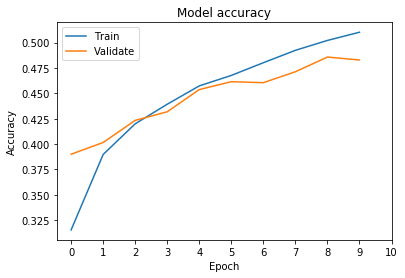

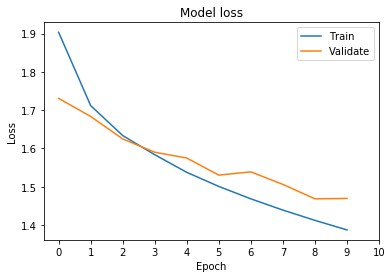

In [16]:
# Plot training & validation accuracy values
plt.plot(mlp_history.history['acc'])
plt.plot(mlp_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, len(mlp_history.epoch)+1, 1))
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(mlp_history.history['loss'])
plt.plot(mlp_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, len(mlp_history.epoch)+1, 1))
plt.legend(['Train', 'Validate'], loc='best')
plt.show()

接著我們來用看看另一個常見的模型 - 卷積神經網路 (Convolution Neural Network, CNN). CNN包含了一個基本的循序操作: 卷積->池化->全連接
- 卷積(convolution): 使用一些濾波器(filter)來找出影像中的特徵
- 池化(pooling): 用來壓縮圖片尺寸, 同時保留影像的重要資訊
- 全連接(fully connection): 同傳統的類神經網路一樣, 用來做最後的分類

其中卷積跟池化是可以持續疊加的, 因此我們可以一直重複 卷積->池化 的動作來減少模型的參數，最後加上全連接層來分類. 如同下面的範例, 我們採用了一個兩次的卷積跟一個全連接層的設計. 這邊我們採用Keras的另一種建模方式-[functional API](https://keras.io/zh/getting-started/functional-api-guide/):

In [17]:
x = Input((32,32,3),name='input')
m = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
m = MaxPool2D(pool_size=(2, 2))(m)
m = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(m)
m = MaxPool2D(pool_size=(2, 2))(m)
m = Flatten()(m)
m = Dense(units=512, activation='relu')(m)
preds = Dense(units=10, activation='softmax', name='outputs')(m)
cnn_model = Model(inputs=x, outputs=preds)
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer= RMSprop(lr=0.0001, decay=1e-6),
                  metrics=['accuracy'])

上面的程式區塊中, 我們設定了輸入的影像尺寸為 32x32 的 R,G,B 彩色圖片, 然後有兩層的卷積層. 第一層卷積層有32個大小為3x3的濾波器, 第二層卷積層有64個大小為3x3的濾波器, 後面接著512個神經元的全連接層跟10個神經元的輸出層.結構圖長的類似下面這張圖:  
<img src="assets/cnn.png" width="600"> 

把模型結構印出來看, 可以發現大約有200萬個左右的參數需要訓練.

In [18]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2097664   
__________

In [19]:
cnn_history = cnn_model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(validX, validY))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 11s 276us/sample - loss: 1.6959 - acc: 0.4004 - val_loss: 1.4644 - val_acc: 0.4781
Epoch 2/10
40000/40000 [==============================] - 12s 293us/sample - loss: 1.3747 - acc: 0.5171 - val_loss: 1.3224 - val_acc: 0.5431
Epoch 3/10
40000/40000 [==============================] - 12s 300us/sample - loss: 1.2363 - acc: 0.5662 - val_loss: 1.2328 - val_acc: 0.5653
Epoch 4/10
40000/40000 [==============================] - 12s 301us/sample - loss: 1.1459 - acc: 0.6001 - val_loss: 1.1313 - val_acc: 0.6046
Epoch 5/10
40000/40000 [==============================] - 11s 276us/sample - loss: 1.0752 - acc: 0.6241 - val_loss: 1.0698 - val_acc: 0.6330
Epoch 6/10
40000/40000 [==============================] - 10s 256us/sample - loss: 1.0169 - acc: 0.6476 - val_loss: 1.0356 - val_acc: 0.6439
Epoch 7/10
40000/40000 [==============================] - 12s 292us/sample - loss: 0.9681 - acc: 0.6643 

我們也一樣畫出模型的學習過程. 可以發現到, 模型對驗證樣本的正確率提升到了 70% 左右. 值得注意的事情是, 跑了10個 epoch 的模型通常還沒有達到最佳的辨認結果, 大家可以自行嘗試看看多跑幾個 epoch 看看.

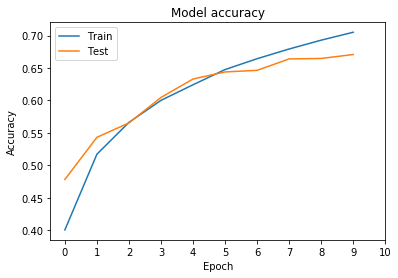

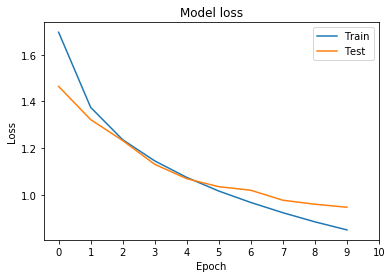

In [20]:
# Plot training & validation accuracy values
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, len(cnn_history.epoch)+1, 1))
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, len(cnn_history.epoch)+1, 1))
plt.legend(['Train', 'Test'], loc='best')
plt.show()

## 步驟4: 模型評估(evaluation)
模型學習完畢後, 我們應該要測試一下模型學的怎麼樣. 我們從測試資料集 **X_test** 隨機的取出一張圖片來測試訓練出來的模型, 看看預測的情況怎麼樣. 大家可以重複執行下面的程式區塊幾次, 看看模型對每個不同的物體的辨認結果.

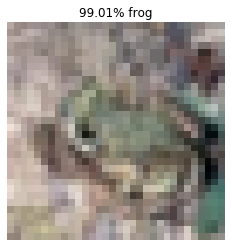

In [21]:
idx = random.randint(0,9999)
im = X_test[idx]
prediction = cnn_model.predict(im.reshape((1,)+im.shape))
predicted_label = np.argmax(prediction)
plt.imshow(im)
plt.axis('off')
text = '{:.2f}% {}'.format(prediction[0][predicted_label]*100, label_name[predicted_label])
plt.title(text)
plt.show()

我們也可以把所有的測試樣本全部餵給模型,得到一個統整性的辨認結果.

In [22]:
y_pred = cnn_model.predict(X_test)

最後我們利用了 `sklearn.metrics.classification_report` 這個功能來顯示模型的整體預測結果. 這些衡量模型好壞的評估方式為
- precision: 正確的物件佔被模型判斷成該物件的比例
- recall: 正確的物件佔所有該物件的比例
- f1-score: precision 和 recall 的調和平均數

有關 precision 和 recall 的詳細定義與計算方式可參考[維基百科](https://en.wikipedia.org/wiki/Precision_and_recall)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.argmax(axis=1), target_names=label_name))

              precision    recall  f1-score   support

   airplaine       0.75      0.69      0.72      1000
  automobile       0.78      0.78      0.78      1000
        bird       0.57      0.54      0.55      1000
         cat       0.51      0.48      0.49      1000
        deer       0.55      0.72      0.63      1000
         dog       0.65      0.49      0.56      1000
        frog       0.72      0.79      0.76      1000
       horse       0.70      0.76      0.73      1000
        ship       0.73      0.84      0.78      1000
       truck       0.83      0.65      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



### 總結
在這個單元裡, 你學習了如何操作 Python, Keras 以及運用類神經網路, 包括:
* 如何將資料集區分為訓練資料, 驗證資料與測試資料
* 如何設定神經網路模型, 包含傳統的多層感知機(MLP)以及卷積神經網路(CNN)
* 如何訓練模型
* 如何評估模型
* 如何利用訓練好的模型進行預測  

希望本教學能讓讀者對於機器學習有更多的認識.

### 延伸閱讀
- [人工智慧互動平台](https://ai.foxconn.com/textbook/interactive/cnn/vgg19/cifar10/examples/img-cat-2.jpg)
- [Tensorflow playground](https://pairlabs.ai/tensorflow-playground/index_tw.html)
- [Google colab 線上撰寫平台](https://colab.research.google.com/notebooks/welcome.ipynb)
- [Coursera 深度學習課程](https://www.coursera.org/learn/neural-networks-deep-learning)

備註:你可以把你訓練好的模型儲存下來供之後使用, 這時你有一些選擇:
1. 直接儲存為 Keras 支援的格式(副檔名為 .h5)
2. 儲存為 Tensorflow 支援的格式(副檔名為 .pb)

如果是 `.h5` 檔案, 你可以直接執行下面的程式區塊來儲存模型資料:

In [24]:
cnn_model.save('model/model.h5')

還有其他方法可以儲存訓練好的模型, 讀者們可以參考 [儲存Keras模型](https://keras.io/zh/getting-started/faq/#how-can-i-save-a-keras-model) 獲得更多資訊.

如果想要儲存成 tensorflow 支援的格式, 可以引用課程提供的函式 `helper.py` 來儲存成`.pb`檔. 使用前要先匯入此py檔.

In [25]:
# this helper.py has tool functions which save a file in pb format.
import helper
helper.save_model_pb(cnn_model, 'model.pb')

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 32 variables.
INFO:tensorflow:Converted 32 variables to const ops.


我們還要另外把每個類別的名字儲存起來, 這樣之後使用模型的時候才會知道每個數字代表的是什麼物件.

In [27]:
with open('model/labels.txt','w') as f:
    for el in label_name:
        f.write('{:s}\n'.format(el))

執行完畢後, 你會在 model 這個資料夾下看到新增的檔案 model.h5, model.pb, labels.txt

在另一個範例中, 我們會示範如何讀取 .h5 或 .pb 檔後進行圖片的預測.